This is the notebook for seting up my visualizations over time

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('master.csv')

In [5]:
#for timeline graphing the model does not need as many features
df=df[['country','year','suicides/100k pop','suicides_no']]

In [6]:
df['suicides']=y

NameError: name 'y' is not defined

In [7]:
df.head()

,country,year,suicides/100k pop,suicides_no
0,Albania,1987,6.71,21
1,Albania,1987,5.19,16
2,Albania,1987,4.83,14
3,Albania,1987,4.59,1
4,Albania,1987,3.28,9


In [8]:
#get a list of countries
countries=df.country.value_counts().index.tolist()

In [10]:
import seaborn as sns

In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

I need to re-write this code so that it will sum up the suicides and the normalized value. Then I should make a sns relplot with x as year, y as normalized suicides and with suicide counts as the size. These plots should also be seperated by country. 

/Users/eyvonnegeordan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]
/Users/eyvonnegeordan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


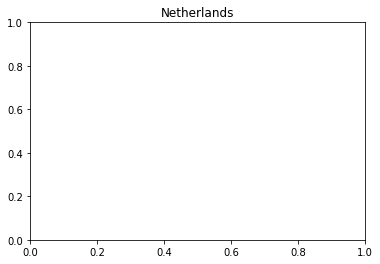

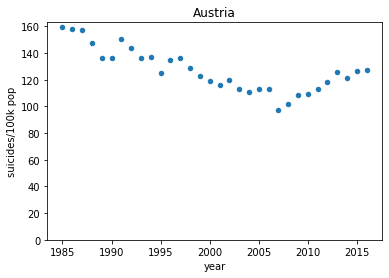

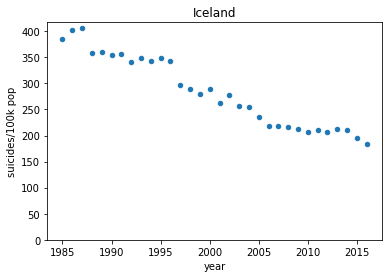

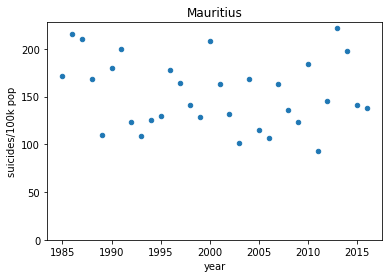

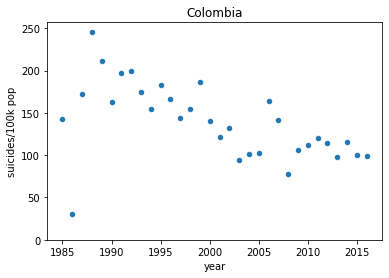

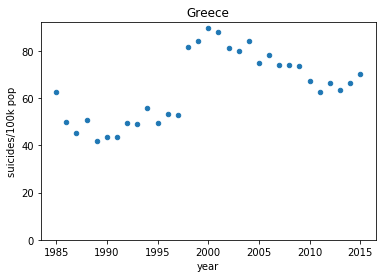

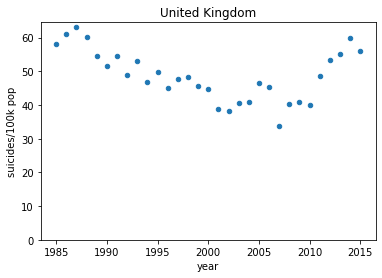

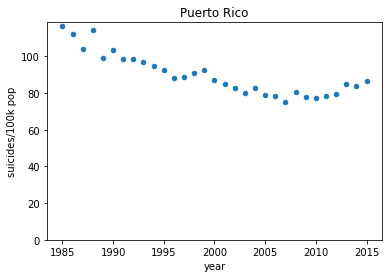

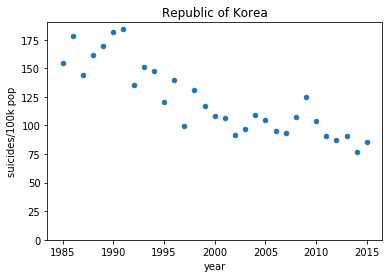

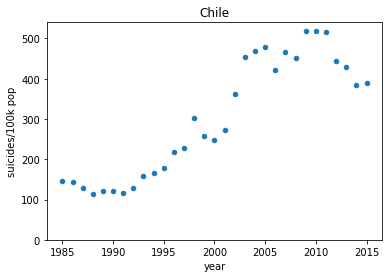

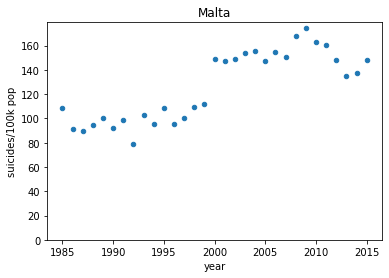

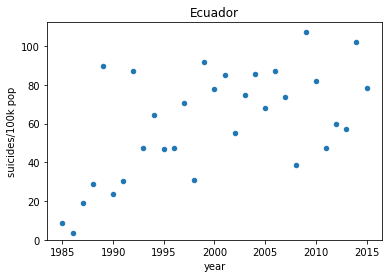

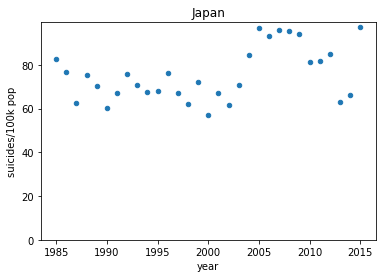

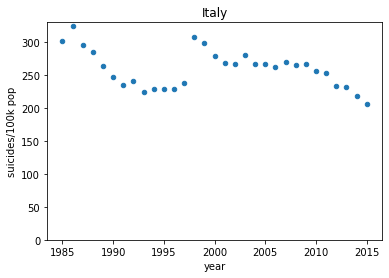

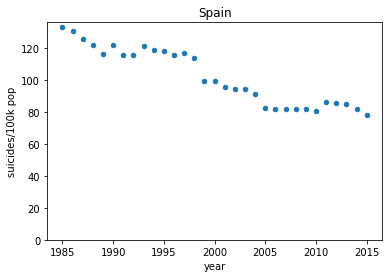

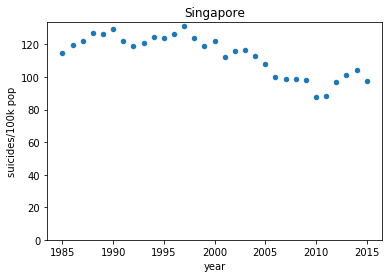

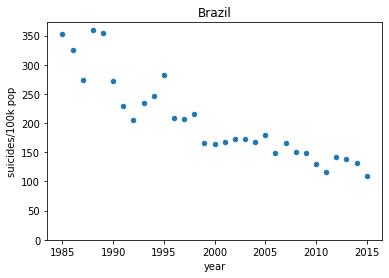

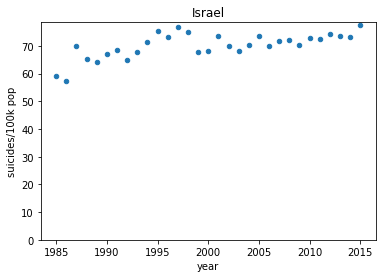

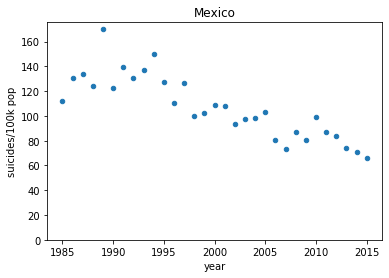

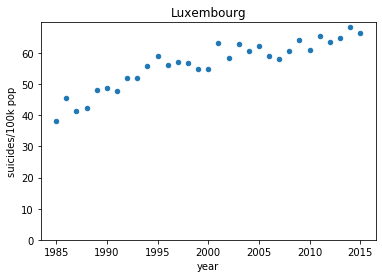

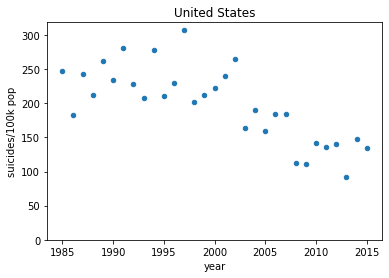

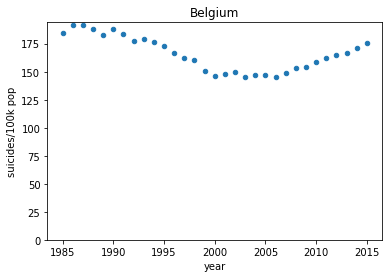

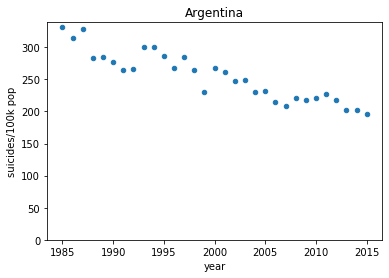

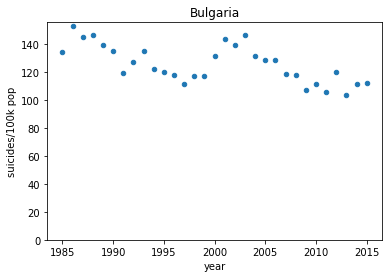

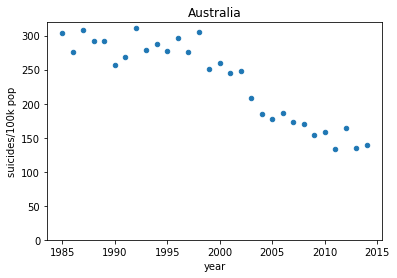

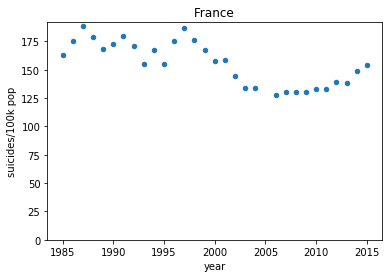

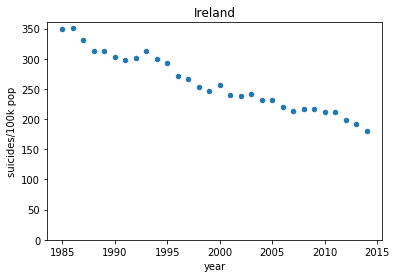

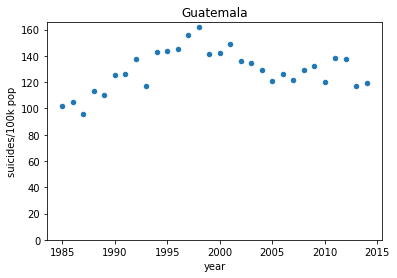

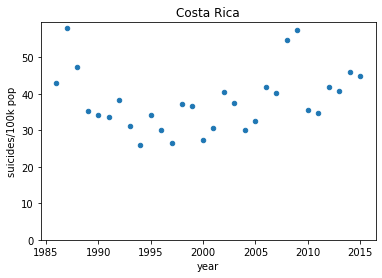

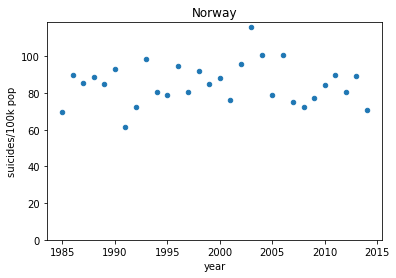

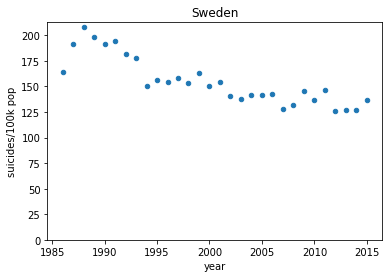

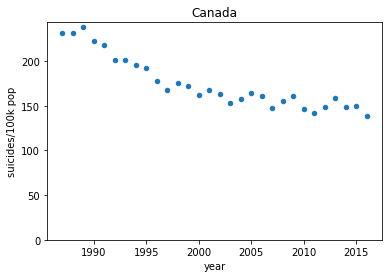

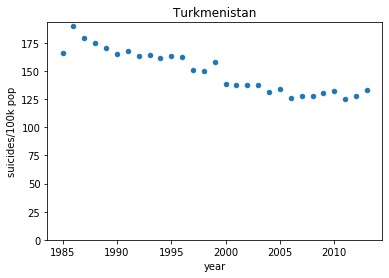

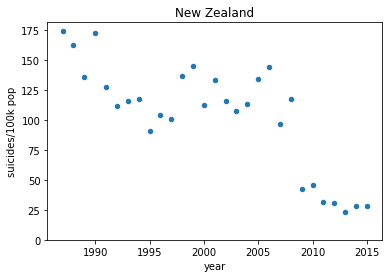

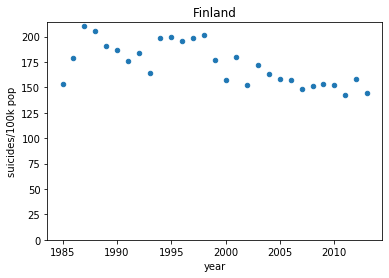

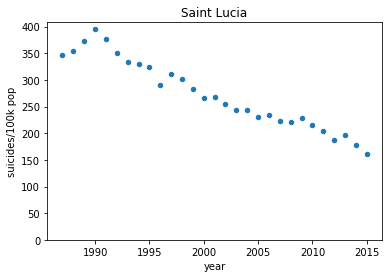

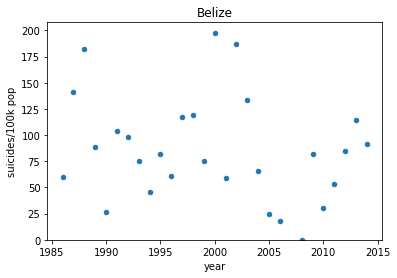

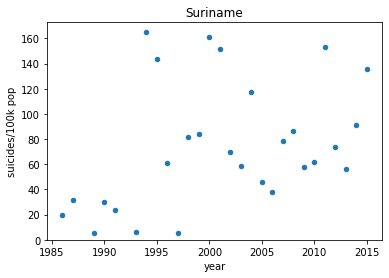

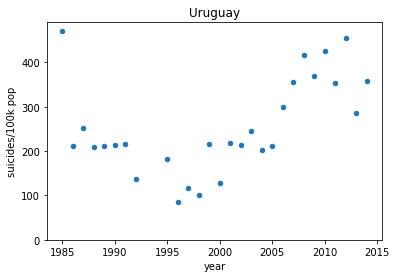

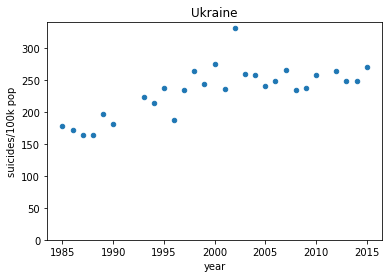

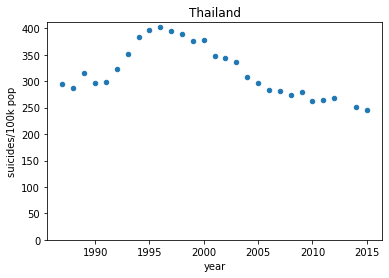

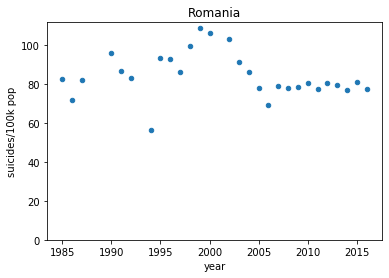

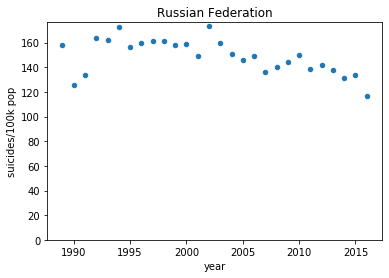

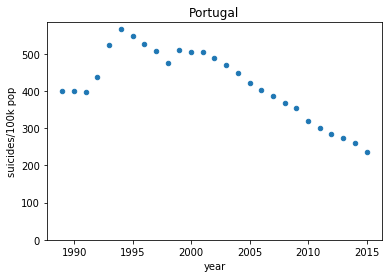

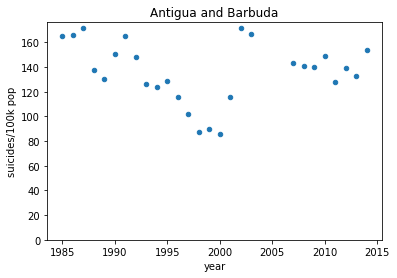

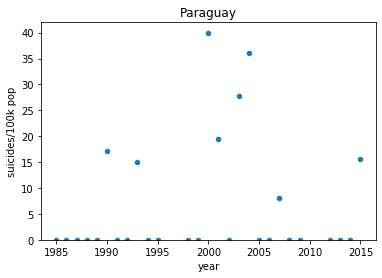

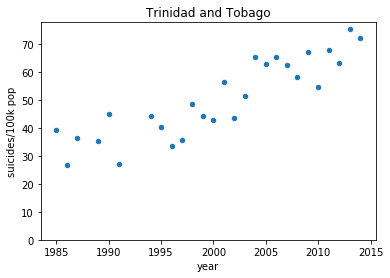

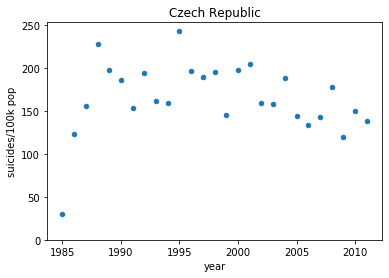

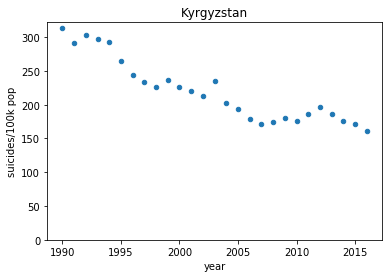

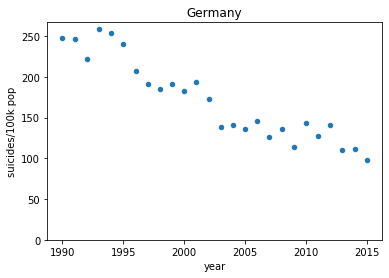

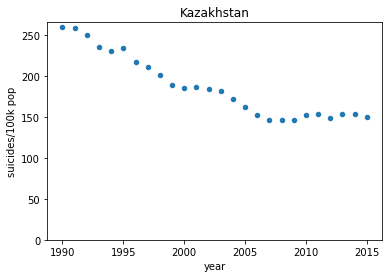

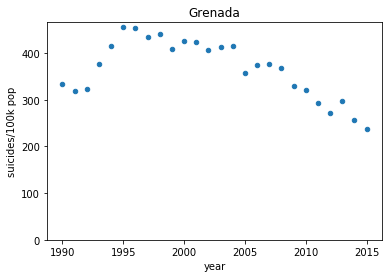

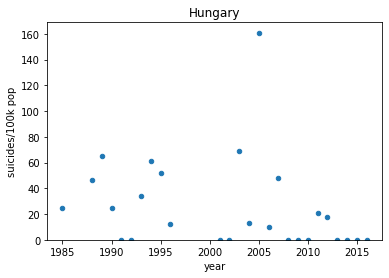

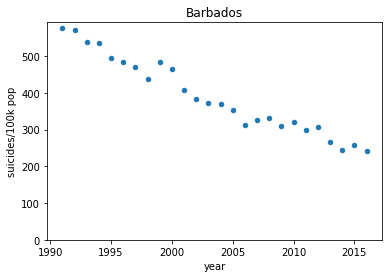

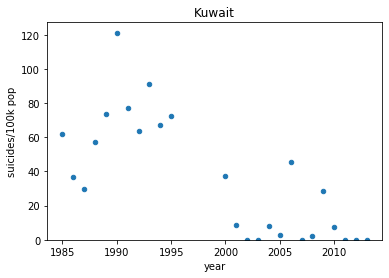

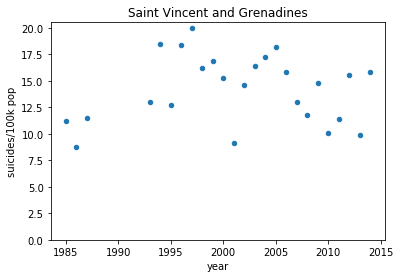

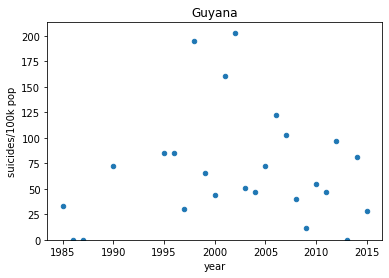

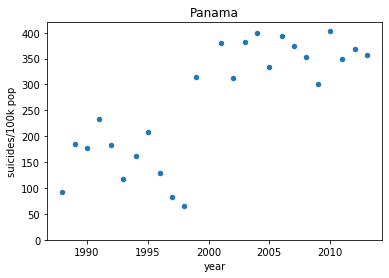

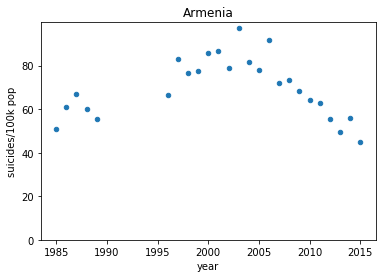

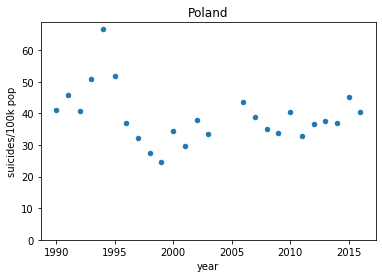

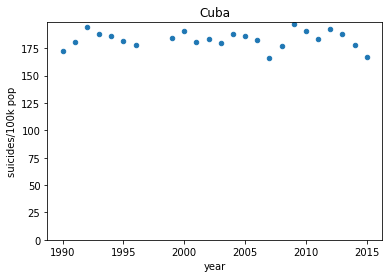

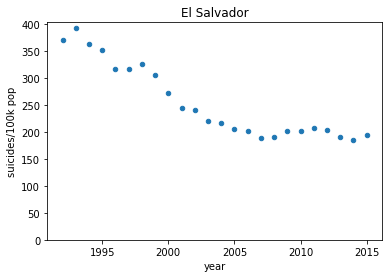

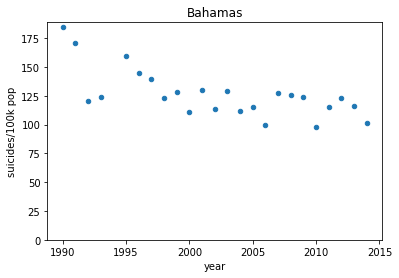

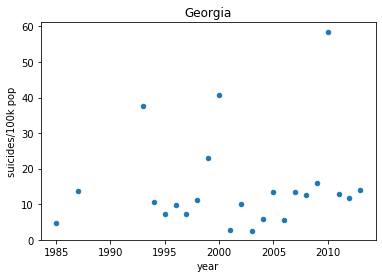

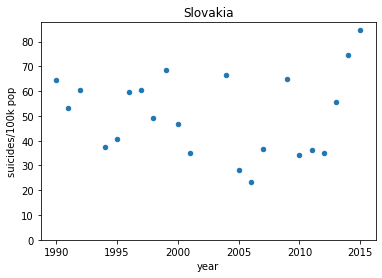

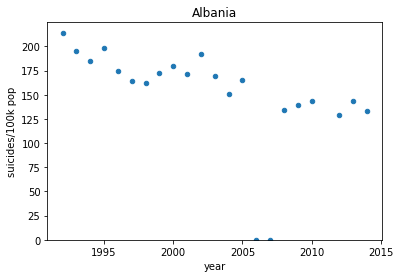

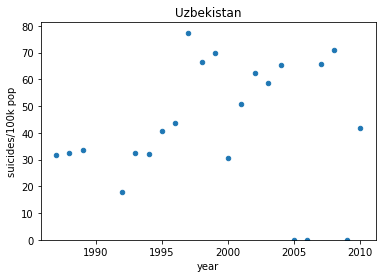

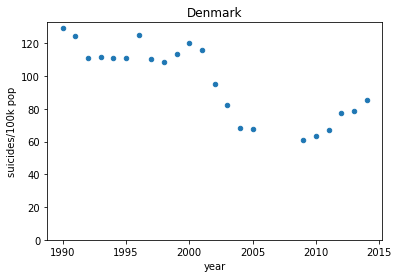

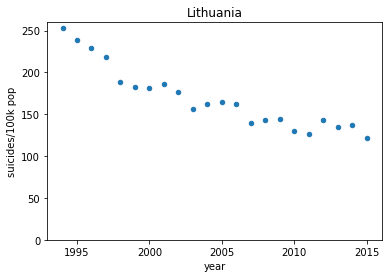

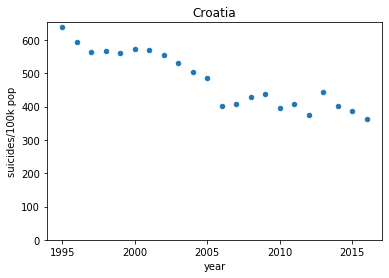

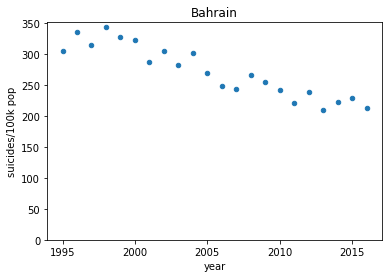

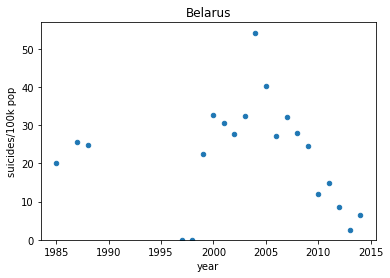

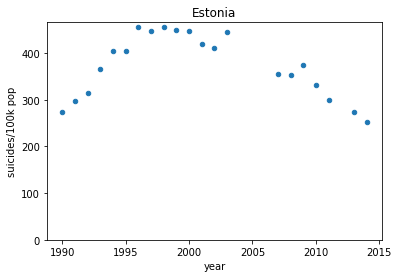

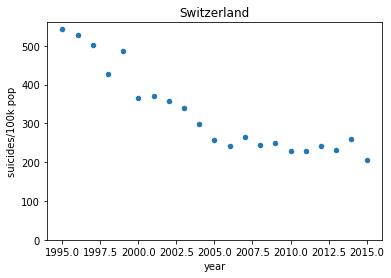

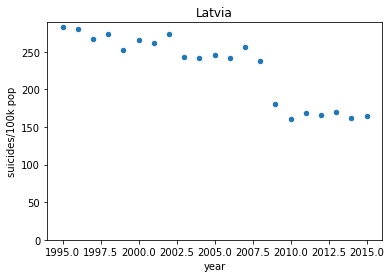

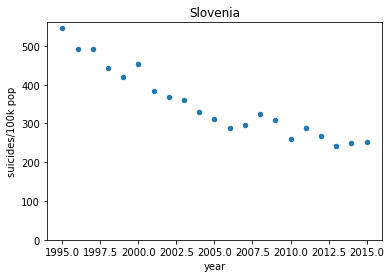

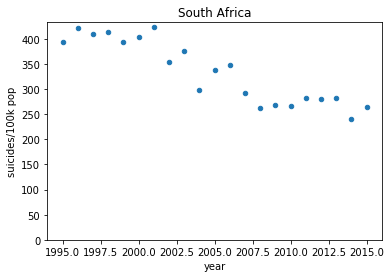

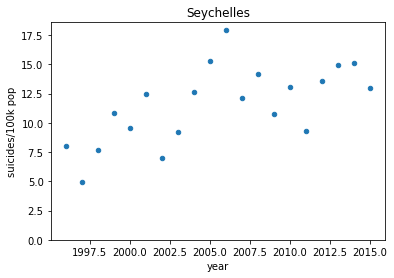

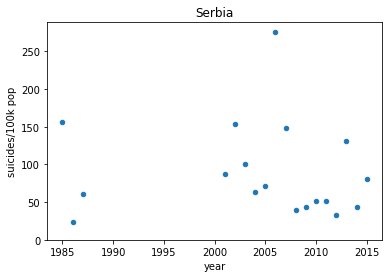

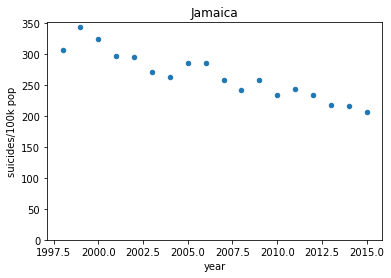

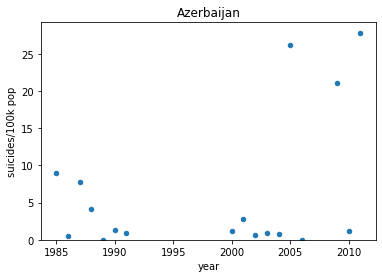

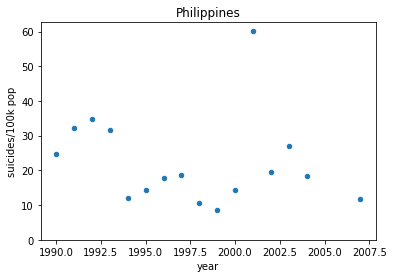

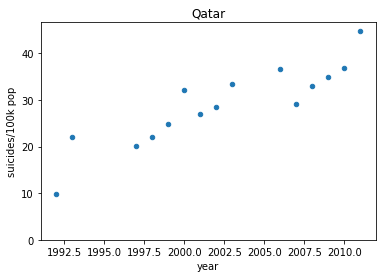

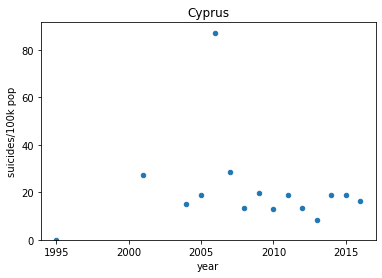

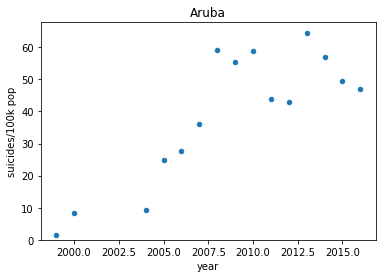

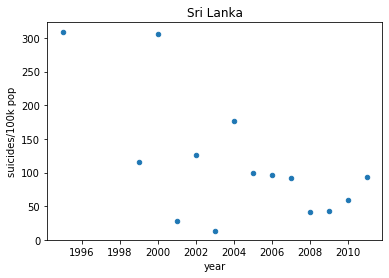

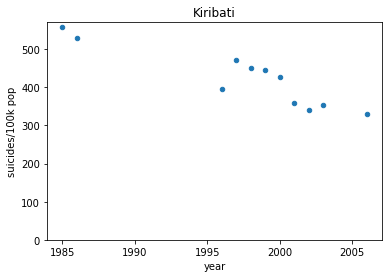

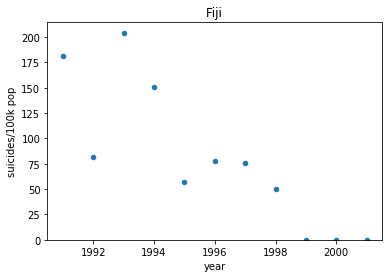

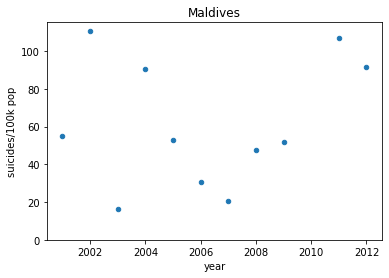

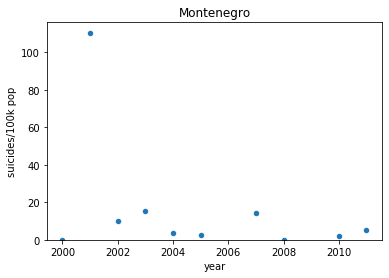

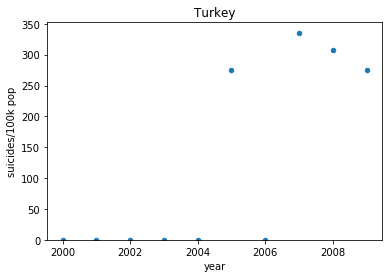

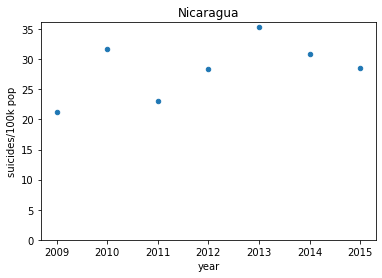

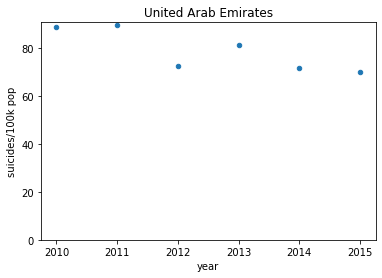

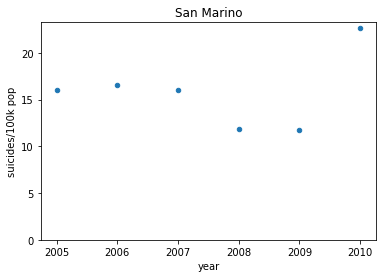

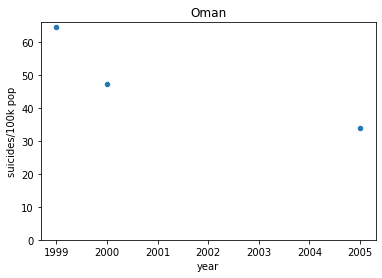

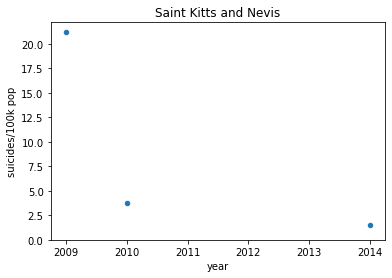

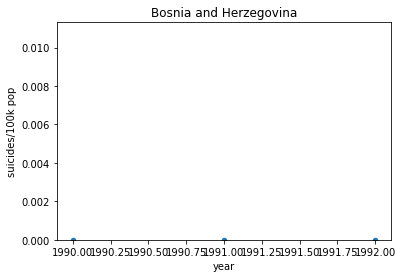

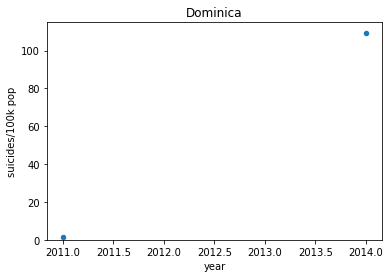

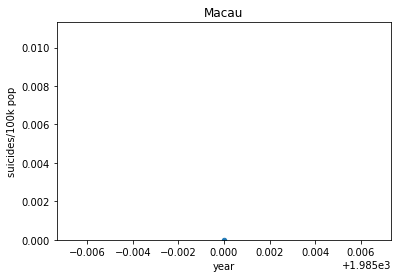

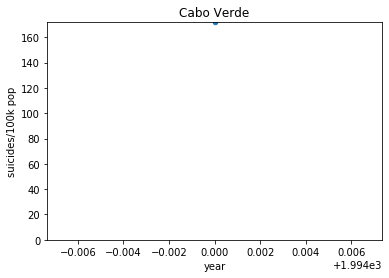

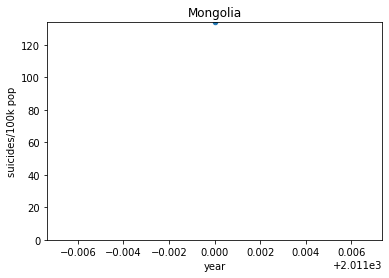

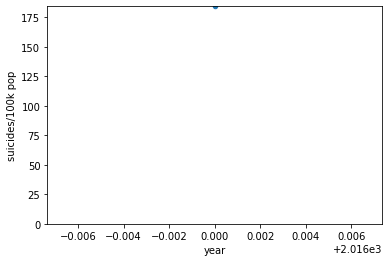

In [12]:
df_yearly_Sums=pd.DataFrame(columns=['Country', 'year','suicides'])
for i, country in enumerate(countries):
    #Isolate a country in its own DF
    countryDF=df[df['country']==country]
    #get a list of the sum of all suicides for each year
    year_suicide=countryDF.groupby('year')['suicides/100k pop'].sum()
    #make a DF of the year ans sums
    year_suicide=year_suicide.reset_index()
    #make and add a feature with the country name
    countrylist=[country] * year_suicide.shape[0]
    year_suicide['Country']=countrylist
    #add the country to the yearly list
    df_yearly_Sums=pd.concat([df_yearly_Sums, year_suicide])
    #plot the graph for the country 
    plt.title(country)
    year_suicide.plot(x='year',y='suicides/100k pop', kind='scatter')
    plt.ylim(0)

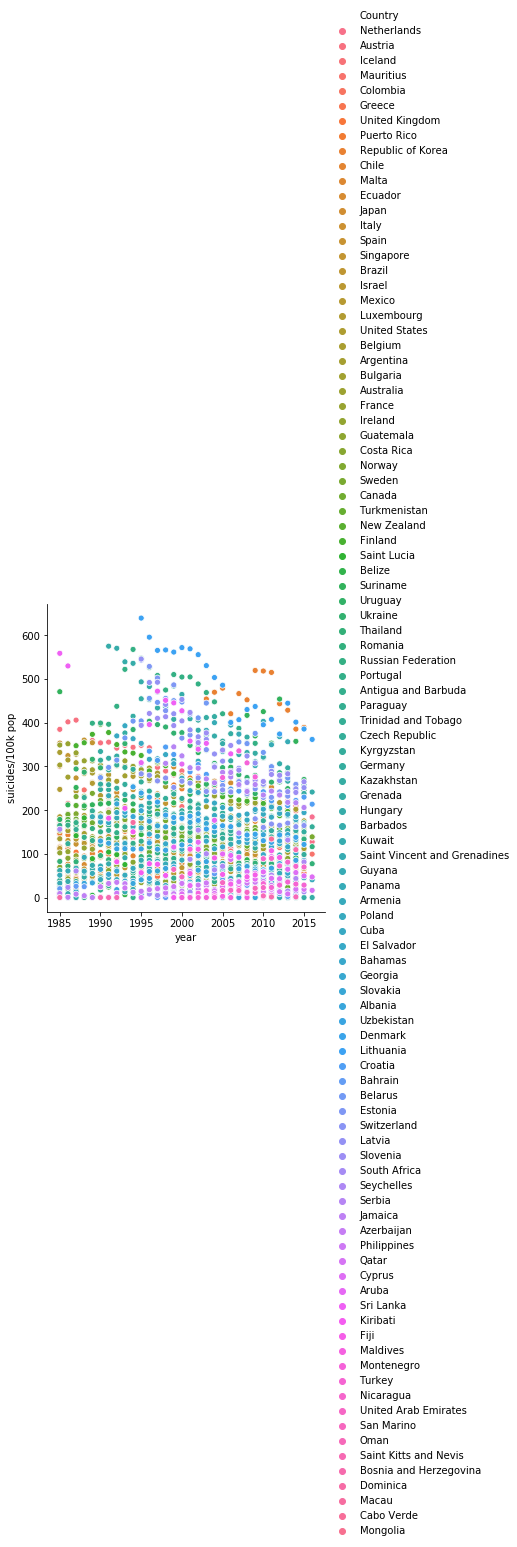

In [14]:
#attempting to put them all into one place but it makes a mess, there are just too many countries. 
sns.relplot('year','suicides/100k pop', hue='Country', data=df_yearly_Sums)

In [11]:
import plotly.express as px

### Observations

There is a clear trend for some countries while in others there is no pattern at all. I feel like this would sugest that there is some future leakage that is happening with a random split. I need to re-run my models with a train/test split that is based on time. 

In [12]:
year_suicide.reset_index()

,index,year,suicides,Country
0,0,2011,5,Bosnia and Herzegovina
1,1,2014,313,Bosnia and Herzegovina


In [13]:
len(countrylist)

2

In [14]:
countryDF.shape

(24, 10)

In [15]:
df_yearly_Sums['Country'].value_counts()

Iceland                   32
Austria                   32
Netherlands               32
Mauritius                 32
Luxembourg                31
Colombia                  31
Malta                     31
Italy                     31
Israel                    31
United Kingdom            31
Argentina                 31
Mexico                    31
Brazil                    31
Spain                     31
Singapore                 31
Chile                     31
Greece                    31
Japan                     31
Belgium                   31
Ecuador                   31
United States             31
Norway                    30
Guatemala                 30
Bulgaria                  30
Australia                 30
Sweden                    30
Costa Rica                30
France                    30
Ireland                   30
Canada                    29
                          ..
Slovakia                  22
Croatia                   22
Georgia                   22
Albania       

In [20]:
fig=px.scatter(df_yearly_Sums, x="year", y="suicides", color="Country",
           hover_name="Country", log_x=True, size_max=60)
fig.show()

In [24]:
df_yearly_Sums.to_csv('yearlysums.csv')


In [26]:
df_yearly_Sums.sort_values(by='Country').to_csv('yearlysums.csv')